# Part 1 : Data preprocessing
 

https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

## Importing the library and dataset


In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRFRegressor
import matplotlib.pyplot as plt

In [103]:
dataset=pd.read_csv('C:/Users/mekon/OneDrive/Desktop/Proiecte ML/Medical Insurence premium detection/Dataset/insurance.csv')

## Data exploration

In [104]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
dataset.shape

(1338, 7)

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [108]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [109]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

4

In [110]:
# statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by 'sex', 'smoker', 'region'

In [111]:
print(dataset['sex'].dtype)
print(dataset['sex'].unique())


object
['female' 'male']


In [112]:
print(dataset.select_dtypes(include=['number']).columns)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [113]:
dataset.groupby('sex').mean(numeric_only=True)

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [114]:
dataset.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [115]:
dataset.groupby('region').mean(numeric_only=True)

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with missing values

In [116]:
dataset.isnull().values.any()

False

In [117]:
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [118]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [119]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [120]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [121]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [122]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [123]:
# one hot encoding 
dataset=pd.get_dummies(data=dataset, drop_first=True)


In [124]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [125]:
dataset.shape

(1338, 9)

## Correlation matrix

In [126]:
x = dataset.drop(columns="charges")
y = dataset["charges"]


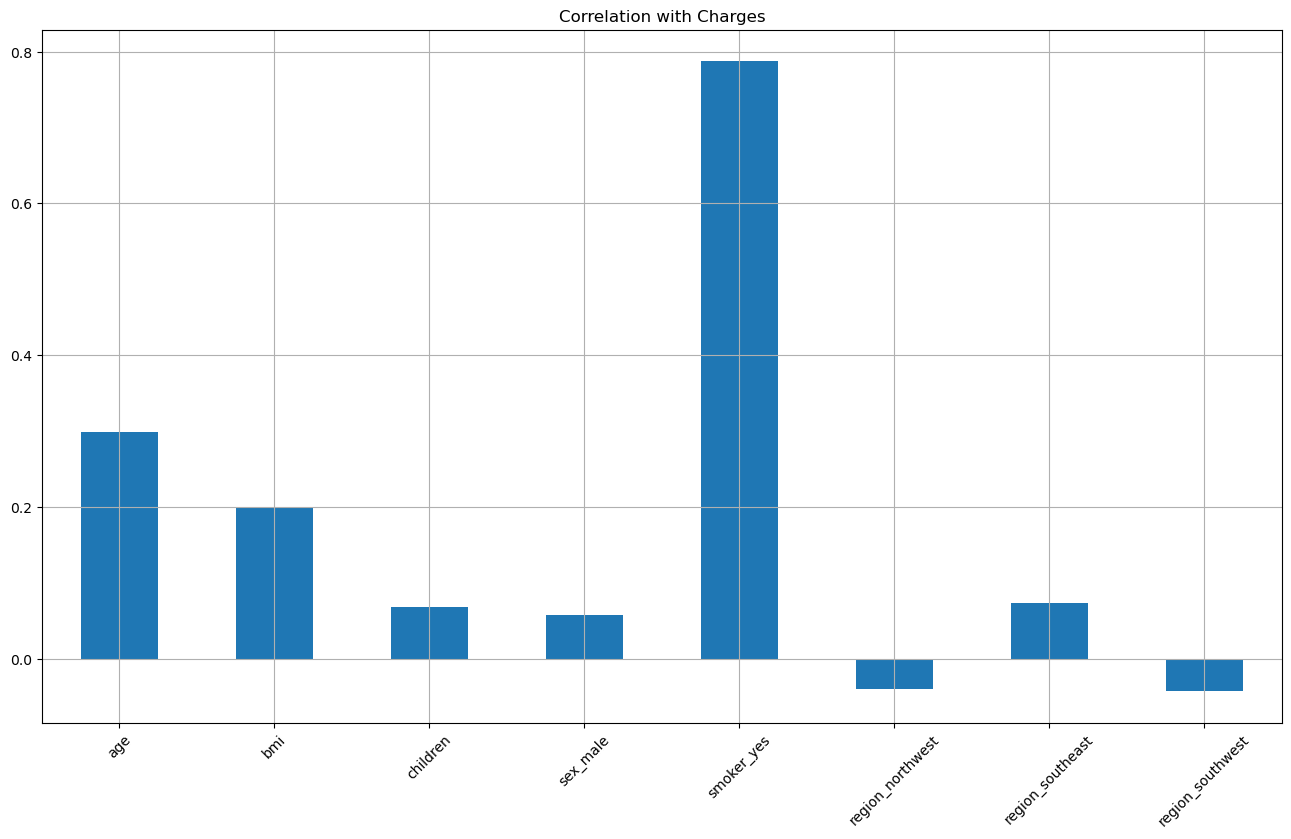

In [127]:
import matplotlib.pyplot as plt  # Importă matplotlib pentru afișarea graficului

# Codul pentru generarea graficului
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16, 9), 
    title='Correlation with Charges', 
    rot=45, 
    grid=True
)

# Afișează graficul
plt.show()


In [128]:
corr=dataset.corr()

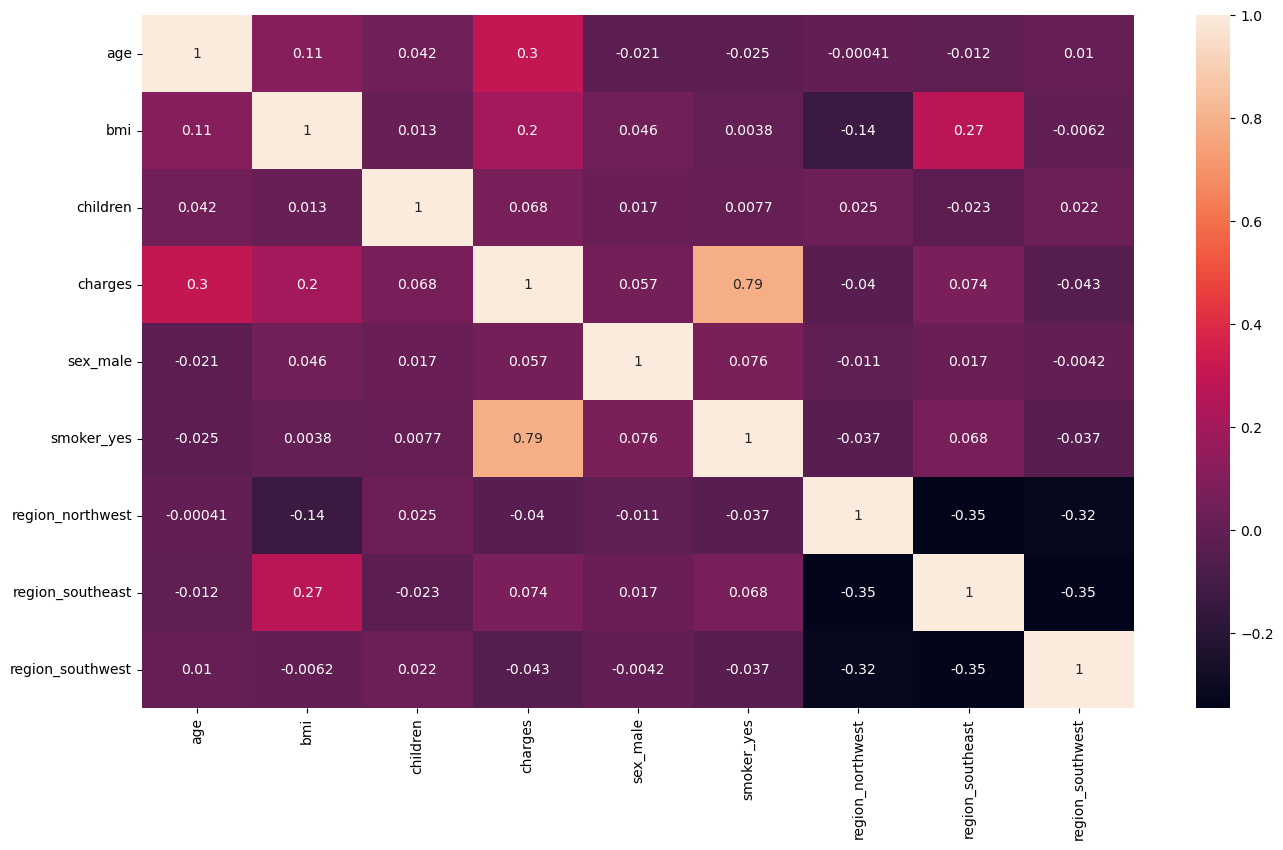

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generarea heatmap-ului
plt.figure(figsize=(16, 9))  # Dimensiunea graficului
sns.heatmap(corr, annot=True)  # Heatmap-ul cu valori afișate

# Afișarea graficului
plt.show()


## Splitting the dataset

In [130]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [131]:
# matrix of features / indenpendent variables
x= dataset.drop(columns='charges')

In [132]:
# target/ dependent variable
y= dataset['charges']

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [134]:
x_train.shape

(1070, 8)

In [135]:
y_train.shape

(1070,)

In [136]:
x_test.shape

(268, 8)

In [137]:
y_test.shape

(268,)

## Feature scalling

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [139]:
x_train

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.03308239, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -0.94368672, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139,  2.82086429,  0.73433626, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 , -0.10932713, -0.91119211, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [140]:
x_test

array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -0.08946143, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -0.60845296, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797,  2.78941026, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867,  0.60252728, -0.08842793, ..., -0.56079971,
        -0.59966106,  1.74729228]])

# Part 2 Building the model

## 1) Multiple Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
regressor_lr= LinearRegression()
regressor_lr.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred=regressor_lr.predict(x_test)

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test, y_pred)

0.7997338990335742

## Random forest regression


In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf= RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
y_pred=regressor_rf.predict(x_test)

In [52]:
r2_score(y_test, y_pred)

0.8704914202037255

## 3) XGBoost regression

In [68]:
# Corectarea scalării
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  # Doar transformare, fără fit

In [57]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
regressor_xgb=XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [142]:
param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],  # Regularizare L1
    'reg_lambda': [1, 1.5, 2],    # Regularizare L2
}



In [143]:
grid_search = GridSearchCV(
    estimator=XGBRFRegressor(random_state=42),
    param_grid=param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

In [144]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=...
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=42, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [200, 400, 600],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.6, 0.7, 0.8, 1.0]},
             scoring='r2', verbose=2)

In [74]:

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [95]:
y_pred=regressor_xgb.predict(x_test)

In [96]:
r2 = r2_score(y_test, y_pred)
print("R2 Score after optimization:", r2)

R2 Score after optimization: -0.054522337338969606


# Predict charges for a new costumer

### Example 1

#### Name: Frank
     Age: 40
     Sex: 1
     bmi:45.50
     children:4
     smoker:1
     region: northeast

In [98]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [100]:
frank_obs=[[40, 45.5, 4, 1, 1,0, 0, 0]]

In [101]:
regressor_rf.predict(sc.transform(frank_obs))

array([57755.6434474])